**1. Load dataset, train Logistic Regression, and print accuracy**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
y = (y == 0).astype(int)  # Convert to binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


**2. Apply L1 regularization**

In [12]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
print("L1 Regularized Accuracy:", accuracy_score(y_test, model_l1.predict(X_test)))


L1 Regularized Accuracy: 1.0


**3. Apply L2 regularization**

In [13]:
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs')
model_l2.fit(X_train, y_train)
print("L2 Regularized Accuracy:", accuracy_score(y_test, model_l2.predict(X_test)))


L2 Regularized Accuracy: 1.0


**4. Apply Elastic Net Regularization**

In [14]:
model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_en.fit(X_train, y_train)
print("Elastic Net Regularized Accuracy:", accuracy_score(y_test, model_en.predict(X_test)))


Elastic Net Regularized Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**5. Train Logistic Regression for multiclass using One-vs-Rest (OvR)**

In [15]:
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs')
model_ovr.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, model_ovr.predict(X_test)))


OvR Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**6. Hyperparameter tuning with GridSearchCV**

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 1.0


**7. Evaluate using Stratified K-Fold Cross-Validation**

In [17]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Average Accuracy:", scores.mean())


Average Accuracy: 1.0


**8. Apply RandomizedSearchCV for hyperparameter **

In [18]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Best Accuracy: 1.0


**9. Implement One-vs-One (OvO) Multiclass Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

model_ovo = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
model_ovo.fit(X_train, y_train)

print("OvO Accuracy:", accuracy_score(y_test, model_ovo.predict(X_test)))


OvO Accuracy: 1.0


**10. Train Logistic Regression and visualize confusion matrix**

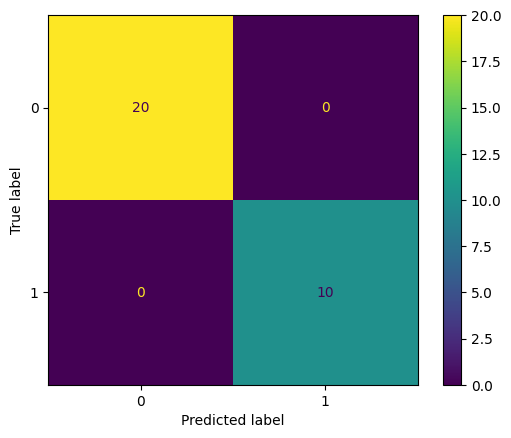

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


**11. Train Logistic Regression and evaluate Precision, Recall, and F1-Score**

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**12. Train Logistic Regression on imbalanced data using class weights**

In [22]:
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)
print("Weighted Model Accuracy:", accuracy_score(y_test, model_weighted.predict(X_test)))


Weighted Model Accuracy: 1.0


**13. Train Logistic Regression on Titanic dataset**

**14. Apply Standardization before Logistic Regression**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
print("Standardized Model Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))


**15. Evaluate Logistic Regression using ROC-AUC score**

In [ ]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


**16. Train Logistic Regression using custom learning rate (C=0.5)**

In [ ]:
model_custom = LogisticRegression(C=0.5)
model_custom.fit(X_train, y_train)
print("Custom C Model Accuracy:", accuracy_score(y_test, model_custom.predict(X_test)))


**17. Identify important features using model coefficients**

In [ ]:
import numpy as np

coefs = np.abs(model.coef_)
important_features = np.argsort(coefs[0])[-5:]  # Get top 5 features
print("Top 5 Important Features:", important_features)


**18. Train Logistic Regression and evaluate Cohen’s Kappa Score**

In [ ]:
from sklearn.metrics import cohen_kappa_score

print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))


**19. Visualize Precision-Recall Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


**20. Train Logistic Regression with different solvers and compare accuracy**

In [ ]:
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model_solver = LogisticRegression(solver=solver)
    model_solver.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {accuracy_score(y_test, model_solver.predict(X_test))}")


**21. Train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare accuracy**

In [ ]:
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model_solver = LogisticRegression(solver=solver)
    model_solver.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {accuracy_score(y_test, model_solver.predict(X_test))}")


**22. Train Logistic Regression and evaluate using Matthews Correlation Coefficient (MCC)**

In [ ]:
from sklearn.metrics import matthews_corrcoef

print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_test, y_pred))


**23. Train Logistic Regression on both raw and standardized data, compare accuracy**

In [ ]:
# Without scaling
model.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, model.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model.predict(X_test_scaled))

print("Accuracy without Scaling:", acc_raw)
print("Accuracy with Scaling:", acc_scaled)


**24. Train Logistic Regression and find the optimal C using cross-validation**

In [ ]:
from sklearn.model_selection import cross_val_score

C_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_C = None

for C in C_values:
    model_C = LogisticRegression(C=C)
    scores = cross_val_score(model_C, X, y, cv=5)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_C = C

print(f"Best C: {best_C} with Accuracy: {best_score}")


**25. Train Logistic Regression, save the trained model using joblib, and load it again to make predictions**

In [26]:
import joblib

# Save the model
joblib.dump(model, "logistic_model.pkl")

# Load the model
loaded_model = joblib.load("logistic_model.pkl")

# Make predictions
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))


Loaded Model Accuracy: 1.0






### **1. What is Logistic Regression, and how does it differ from Linear Regression?**

* **Logistic Regression** is used for **classification** tasks (e.g., spam/not spam).
* **Linear Regression** is used for **regression** tasks (predicting continuous values).
* Logistic Regression outputs probabilities (between 0 and 1) using a **sigmoid function**, while Linear Regression outputs real numbers.

---

### **2. What is the mathematical equation of Logistic Regression?**

$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n)}}
$$

---

### **3. Why do we use the Sigmoid function in Logistic Regression?**

* It maps the linear output to a **probability between 0 and 1**, making it suitable for classification.

---

### **4. What is the cost function of Logistic Regression?**

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

This is called the **log-loss** or **binary cross-entropy** function.

---

### **5. What is Regularization in Logistic Regression? Why is it needed?**

* Regularization adds a **penalty** to the loss function to prevent **overfitting**.
* It discourages overly complex models (large coefficients).

---

### **6. Explain the difference between Lasso, Ridge, and Elastic Net regression.**

* **Lasso (L1):** Adds $\lambda \sum |\beta_j|$; can shrink coefficients to zero (feature selection).
* **Ridge (L2):** Adds $\lambda \sum \beta_j^2$; shrinks coefficients but keeps all features.
* **Elastic Net:** Combines L1 and L2; balances sparsity and regularization.

---

### **7. When should we use Elastic Net instead of Lasso or Ridge?**

* When features are **correlated** or when **Lasso alone underperforms**.
* Elastic Net balances variable selection and coefficient shrinkage.

---

### **8. What is the impact of the regularization parameter (λ) in Logistic Regression?**

* **Higher λ:** More regularization → smaller coefficients → may underfit.
* **Lower λ:** Less regularization → risk of overfitting.

---

### **9. What are the key assumptions of Logistic Regression?**

* No multicollinearity.
* Linear relationship between features and **log-odds**.
* Independence of observations.
* Large sample size for stable estimates.

---

### **10. What are some alternatives to Logistic Regression for classification tasks?**

* Decision Trees
* Random Forest
* Support Vector Machines (SVM)
* k-Nearest Neighbors (k-NN)
* Naïve Bayes
* Neural Networks

---

### **11. What are Classification Evaluation Metrics?**

* Accuracy
* Precision
* Recall
* F1-score
* ROC-AUC
* Confusion Matrix

---

### **12. How does class imbalance affect Logistic Regression?**

* It can lead to biased predictions toward the **majority class**, reducing model performance for the minority class.

---

### **13. What is Hyperparameter Tuning in Logistic Regression?**

* It involves choosing the best values for parameters like:

  * Regularization strength (λ or `C`)
  * Penalty type (L1/L2)
  * Solver
    Using techniques like Grid Search or Random Search.

---

### **14. What are different solvers in Logistic Regression? Which one should be used?**

* **liblinear:** Good for small datasets, supports L1.
* **saga:** Large datasets, supports L1, L2, and Elastic Net.
* **newton-cg**, **lbfgs:** Good for L2, multiclass.
* Choose based on dataset size and regularization type.

---

### **15. How is Logistic Regression extended for multiclass classification?**

* **One-vs-Rest (OvR):** Fits one classifier per class.
* **Softmax Regression (Multinomial Logistic Regression):** Predicts all classes in one model using the softmax function.

---

### **16. What are the advantages and disadvantages of Logistic Regression?**

**Advantages:**

* Simple, interpretable
* Efficient for binary classification
* Works well with linearly separable data

**Disadvantages:**

* Poor performance on complex relationships
* Assumes linearity in log-odds
* Sensitive to multicollinearity

---

### **17. What are some use cases of Logistic Regression?**

* Spam detection
* Disease diagnosis (e.g., diabetes prediction)
* Customer churn prediction
* Credit scoring
* Fraud detection

---

### **18. What is the difference between Softmax Regression and Logistic Regression?**

* **Logistic Regression:** Binary classification.
* **Softmax Regression:** Multiclass classification with mutually exclusive classes.

---

### **19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**

* **OvR:** Simpler, good for unbalanced classes or when interpretability is key.
* **Softmax:** More accurate for balanced and mutually exclusive classes; considers all classes at once.

---

### **20. How do we interpret coefficients in Logistic Regression?**

* Each coefficient represents the **log-odds** change in the outcome for a 1-unit increase in the predictor.
* Exponentiating a coefficient ($e^{\beta}$) gives the **odds ratio**.

---
